In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.base import clone
from sklearn.model_selection import KFold
import numpy as np


def showPredictedAndReal(X, y):
	_, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(15, 5))
	for ax, image, label in zip(axes, X, y):
		ax.set_axis_off()
		ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r)
		ax.set_title("Predicted: %s" % str(label))


def plotConfusionMatrix(predicted, y):
	_, ax = plt.subplots(figsize=(10, 10))
	ConfusionMatrixDisplay(confusion_matrix(y, predicted)).plot(ax=ax, colorbar=False)


def TrainWithCrossValidation(classifier, X, y, folds, shuffle=False):
	trainedClassifiersList = []
	listOfAccuracies = []
	for train_index, test_index in KFold(n_splits=folds, shuffle=shuffle).split(X):
		classifier_fold = clone(classifier)
		classifier_fold.fit(X[train_index], y[train_index])
		prediction = classifier_fold.predict(X[test_index])
		trainedClassifiersList.append(classifier_fold)
		listOfAccuracies.append(accuracy_score(y[test_index], prediction))
	return trainedClassifiersList, listOfAccuracies


def findBestClassifier(classifier, X_train, y_train, X_val, y_val):
	trainedClassifiersList, listOfAccuracies = TrainWithCrossValidation(classifier, X_train, y_train, 5)
	bestClassifier = trainedClassifiersList[np.argmax(listOfAccuracies)]
	accuracy = 0.0
	for i in range(len(listOfAccuracies)):
		accuracy += accuracy_score(y_val, trainedClassifiersList[i].predict(X_val))
	print(listOfAccuracies)
	print("Accuracy %.4f" % (accuracy / len(listOfAccuracies)))

	return bestClassifier


def showResult(clf, X_train, y_train, X_val, y_val, showMistakes=True, numberOfMistakesToShow=8):
	bestClassifier = findBestClassifier(clf, X_train, y_train, X_val, y_val)
	predictions = bestClassifier.predict(X_val)
	plotConfusionMatrix(y_val, predictions)
	mistakes = [i for i in range(len(predictions)) if predictions[i] != y_val[i]]
	if showMistakes:
		showPredictedAndReal(X_val[mistakes][:numberOfMistakesToShow],
							 predictions[mistakes][:numberOfMistakesToShow])

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
trainSize = 15000
testSize = int(0.4 * trainSize)
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=trainSize, test_size=testSize)

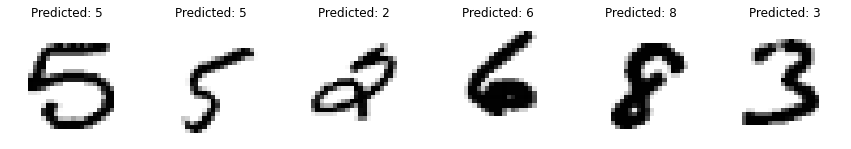

In [3]:
showPredictedAndReal(train_x[:6], train_y[:6])

# KNN classifier

In [30]:
KNN = [KNeighborsClassifier(2), KNeighborsClassifier(8), KNeighborsClassifier(16)]

[0.945, 0.9396666666666667, 0.9396666666666667, 0.946, 0.935]
Accuracy 0.9416
[0.952, 0.9463333333333334, 0.9506666666666667, 0.9493333333333334, 0.9433333333333334]
Accuracy 0.9421
[0.948, 0.94, 0.9436666666666667, 0.941, 0.9366666666666666]
Accuracy 0.9352


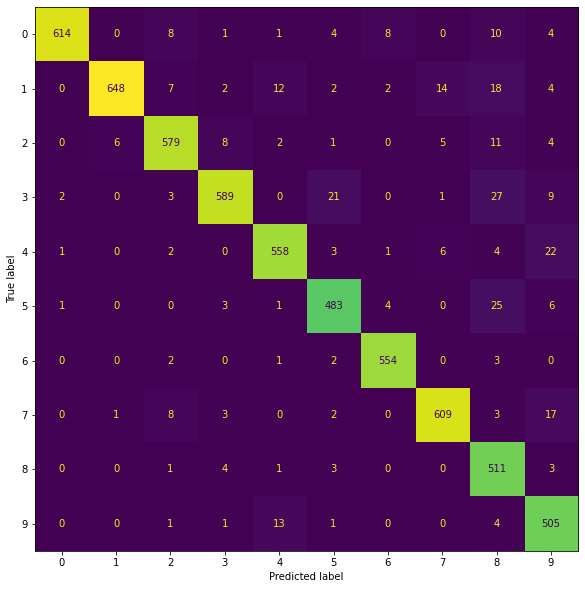

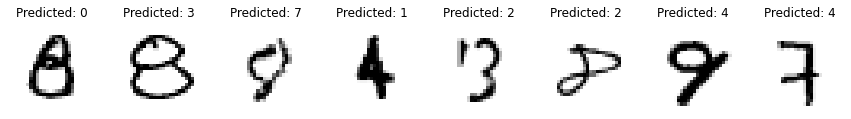

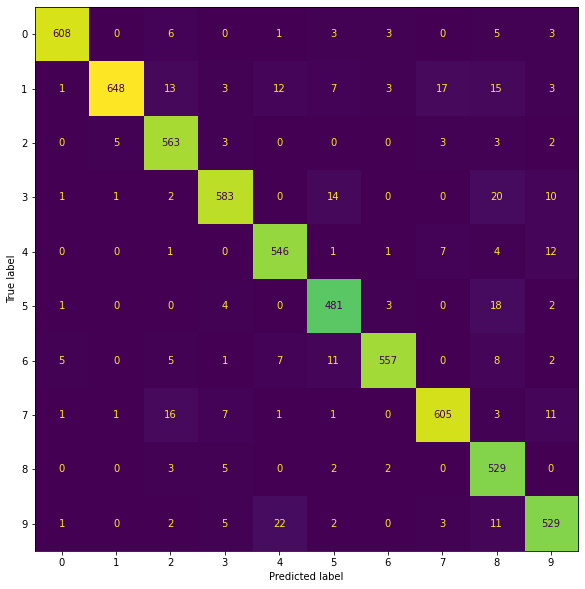

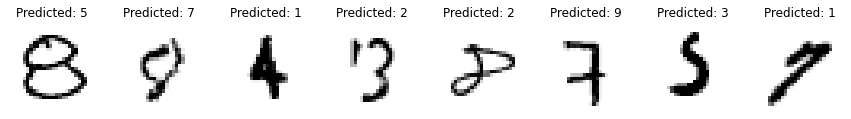

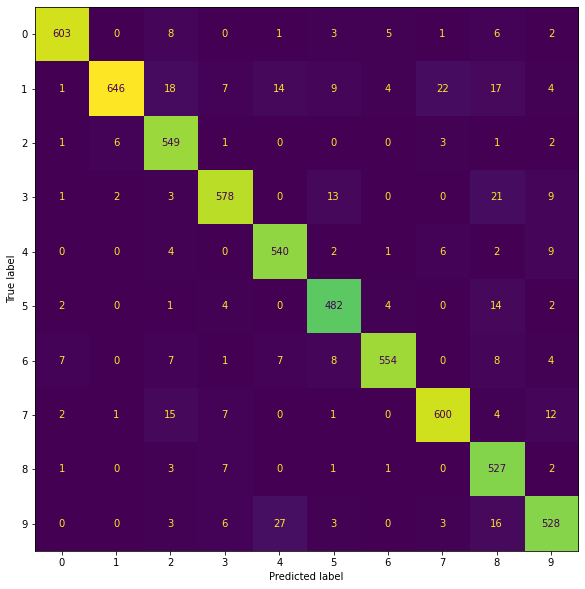

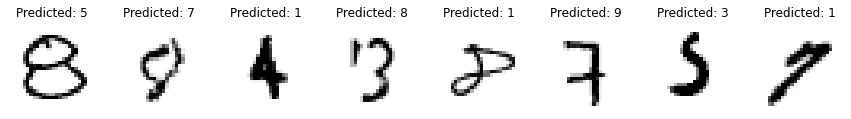

In [31]:
for knn in KNN:
	showResult(knn, train_x, train_y, test_x, test_y)

# Decision tree classifier

In [ ]:
DecisionTreeClassifiers = [DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=5),
						   DecisionTreeClassifier(max_depth=15), DecisionTreeClassifier(max_depth=20)]

[0.34933333333333333, 0.341, 0.345, 0.35133333333333333, 0.345]
Accuracy 0.3443
[0.671, 0.659, 0.6643333333333333, 0.6823333333333333, 0.6666666666666666]
Accuracy 0.6612
[0.8246666666666667, 0.8143333333333334, 0.8196666666666667, 0.8376666666666667, 0.8206666666666667]
Accuracy 0.8152
[0.8203333333333334, 0.8106666666666666, 0.8203333333333334, 0.8406666666666667, 0.8183333333333334]
Accuracy 0.8118


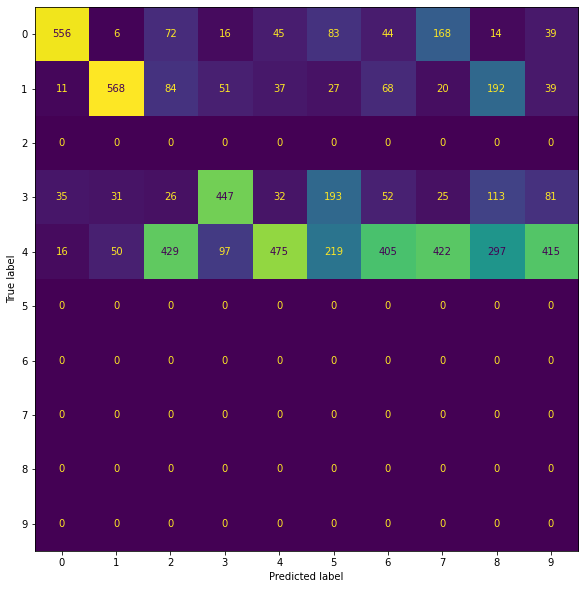

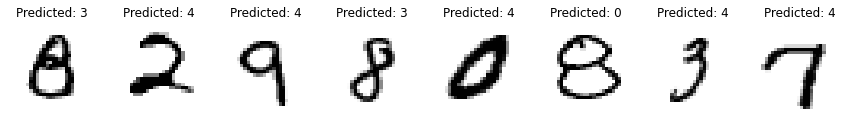

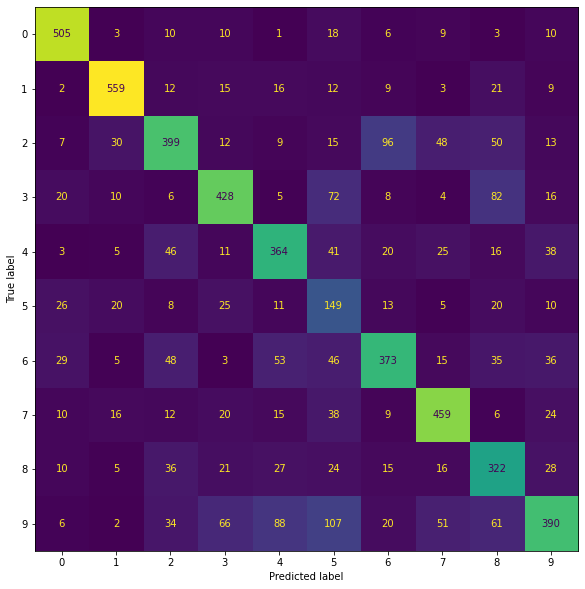

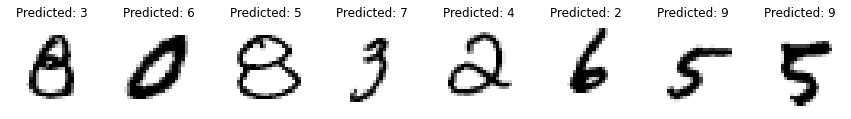

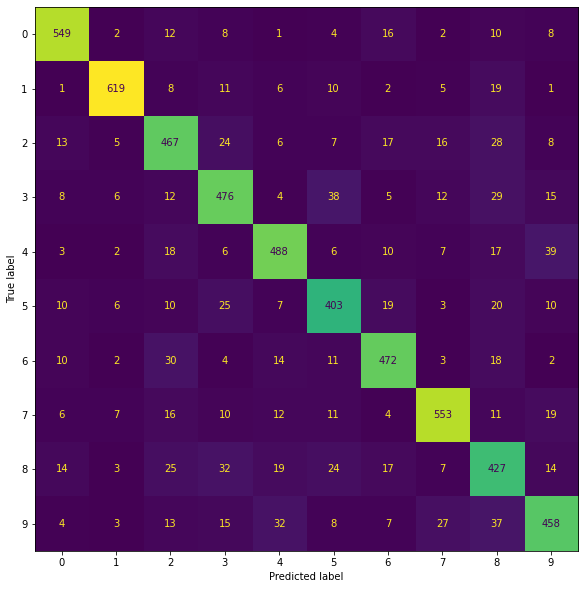

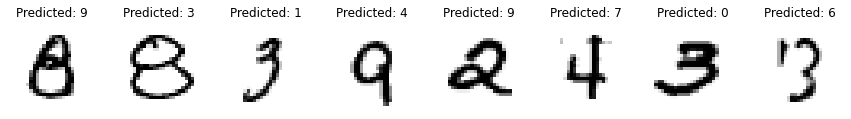

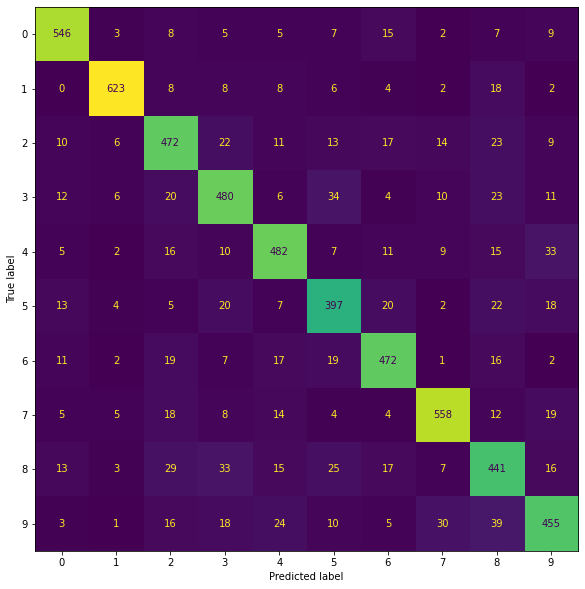

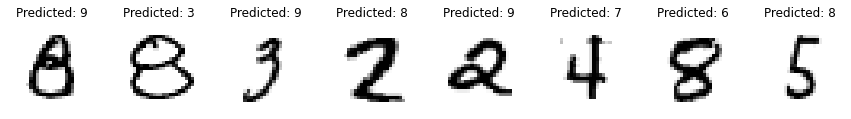

In [33]:
for dtc in DecisionTreeClassifiers:
	showResult(dtc, train_x, train_y, test_x, test_y)

# SVC classifier

In [ ]:
SVCkernels = {'poly', 'rbf', 'sigmoid'}

[0.963, 0.9536666666666667, 0.9586666666666667, 0.957, 0.9536666666666667]
Accuracy 0.9520
[0.8223333333333334, 0.8076666666666666, 0.8103333333333333, 0.824, 0.8176666666666667]
Accuracy 0.8168
[0.9683333333333334, 0.9613333333333334, 0.9636666666666667, 0.9646666666666667, 0.9583333333333334]
Accuracy 0.9586


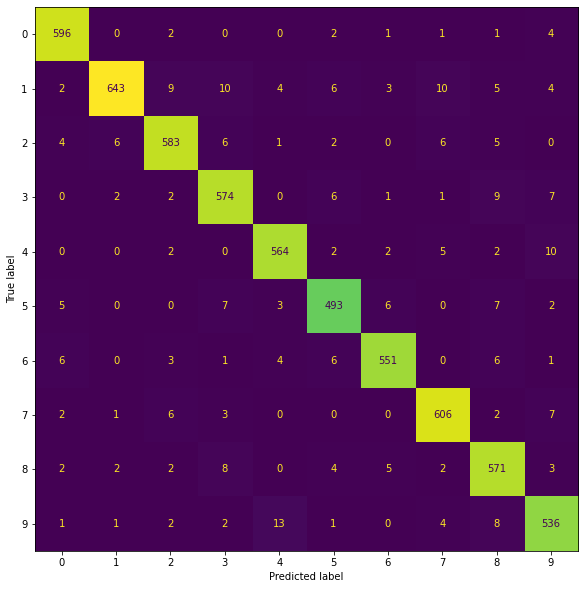

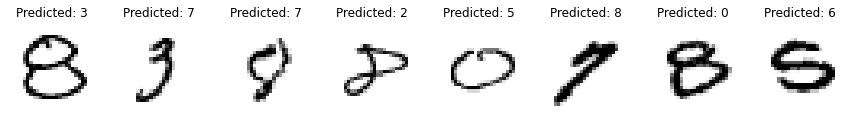

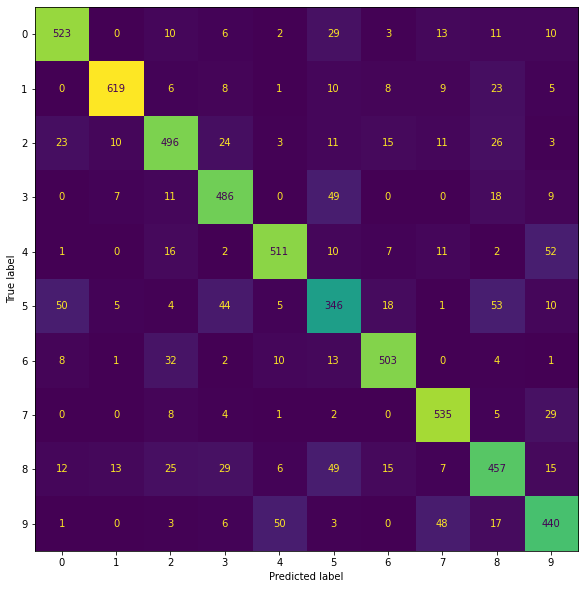

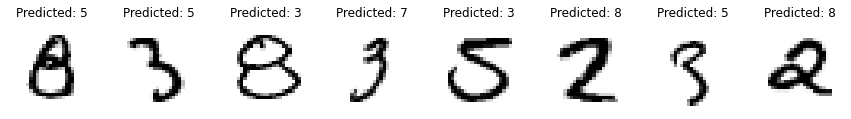

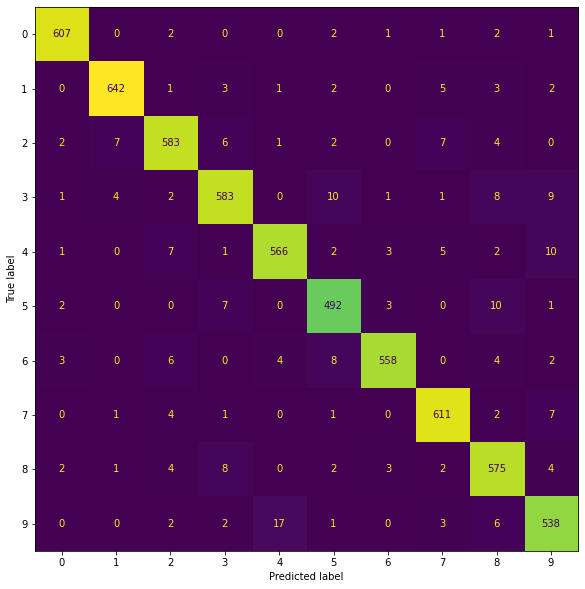

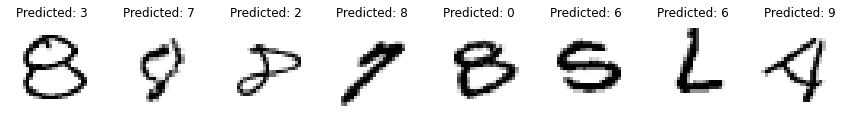

In [35]:
for kernel in SVCkernels:
	showResult(SVC(kernel=kernel), train_x, train_y, test_x, test_y)

# Logistic regression classifier

[0.909, 0.9126666666666666, 0.9073333333333333, 0.9073333333333333, 0.8966666666666666]
Accuracy 0.9060


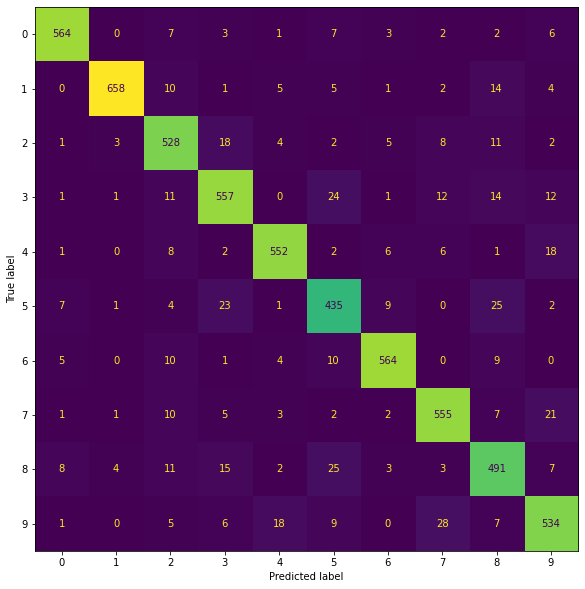

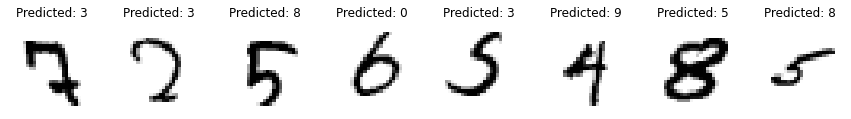

In [8]:
showResult(LogisticRegression(penalty="l1", solver="saga", tol=0.01), train_x, train_y, test_x,
		   test_y)

[0.9076666666666666, 0.914, 0.908, 0.906, 0.898]
Accuracy 0.9062


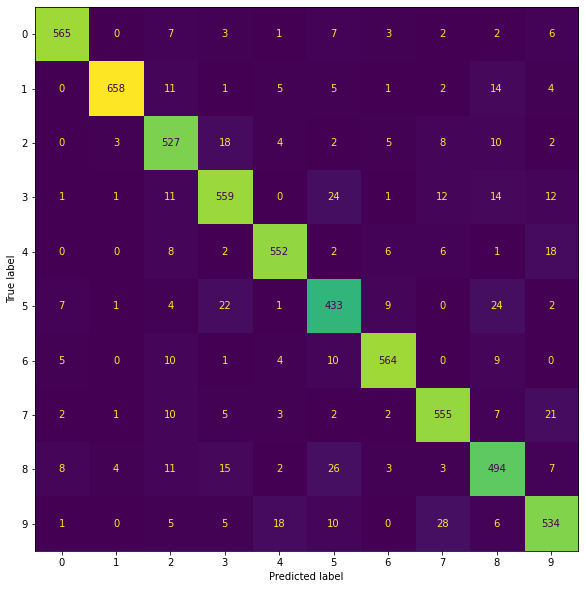

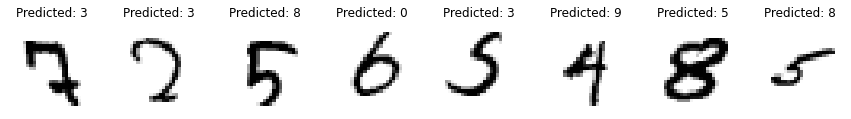

In [9]:
showResult(LogisticRegression(penalty="elasticnet", solver="saga", tol=0.01, l1_ratio=0.2), train_x, train_y,
		   test_x, test_y)